# Impulse Response of Ladder Filters

We consider a series connection of 4 first order lowpass filters. This filter configuration, if implemented as analog electronic circuit in a particular way, as pioneered by the famous musical synthesizer designer Robert Moog, resembles a ladder - hence it's sometimes called ladder filter. The impulse response of each of 4 first order stages is given by:
$$h_1(t) = e^{-a t} \qquad \text{for } t \geq 0 \text{, 0 otherwise}$$
where $a$ is the decay rate which is related to the cutoff frequency $\omega_c$ by $a = 2 \pi \omega_c$. The impulse response of a series connection of 2 such filters, which we shall denote by $h_2(t)$, is given by the convolution of $h_1(t)$ with itself:
$$h_2(t) = h_1(t) * h_1(t) = \int_{-\infty}^{\infty} h_1(t) h_1(t-\tau) d\tau$$
Noting that $h_1(t) = 0$ for $t < 0$, we can replace the infinite integration limits by $0$ and $t$ respectively, so:
$$h_2(t) = \int_{0}^{t} h_1(t) h_1(t-\tau) d\tau = \int_{0}^{t} e^{-a t} e^{-a (t-\tau)} d\tau$$
To solve the integral, we'll use the sympy symbolic computation package for python:

In [1]:
from sympy import *
from IPython.display import display
init_printing(use_latex='mathjax')
t     = Symbol('t', nonnegative=True)      # time variable
a     = Symbol('a', positive=True)         # decay rate
tau   = Symbol('tau')                      # dummy integration variable
h1    = exp(-a*t)                          # impulse response h1(t)
h1tau = exp(-a*(t-tau))                    # h1(t-tau), for convolution
h2    = integrate(h1*h1tau, (tau, 0, t))   # find h2 by doing convolution integral
h2    = simplify(h2)
display(h2)

⎛ a⋅t    ⎞  -2⋅a⋅t
⎝ℯ    - 1⎠⋅ℯ      
──────────────────
        a         

This $h_2(t)$ function would be the output, tapped off after the second stage of our ladder. Likewise, the impulse response after the 3rd and 4th stage, are found by convolving the impulse response of the preceding stage with $h_1(t)$ again. So, for the impulse responses of the 3rd and 4th stage we get:

In [2]:
h3 = integrate(h2*h1tau, (tau, 0, t))   # h3 = convolve h2 with h1
h4 = integrate(h3*h1tau, (tau, 0, t))   # h4 = convolve h3 with h1
h3 = simplify(h3)
h4 = simplify(h4)
display(h3, h4)

⎛ 2⋅a⋅t      a⋅t    ⎞  -3⋅a⋅t
⎝ℯ      - 2⋅ℯ    + 1⎠⋅ℯ      
─────────────────────────────
               2             
              a              

⎛ 3⋅a⋅t      2⋅a⋅t      a⋅t    ⎞  -4⋅a⋅t
⎝ℯ      - 3⋅ℯ      + 3⋅ℯ    - 1⎠⋅ℯ      
────────────────────────────────────────
                    3                   
                   a                    

So, in summary, for the impulse responses of the 4 successive stages of the ladder filter, we have:
$$
\begin{aligned}
h_1(t) &= e^{-\alpha t} \\
h_2(t) &= \frac{1}{a} \left(e^{a t} - 1\right) e^{- 2 a t} \\
h_3(t) &= \frac{1}{a^{2}} \left(e^{2 a t} - 2 e^{a t} + 1\right) e^{- 3 a t} \\
h_4(t) &= \frac{1}{a^{3}} \left(e^{3 a t} - 3 e^{2 a t} + 3 e^{a t} - 1\right) e^{- 4 a t} \\
\end{aligned}
$$


Let's plot the 4 impulse response functions for a=1:

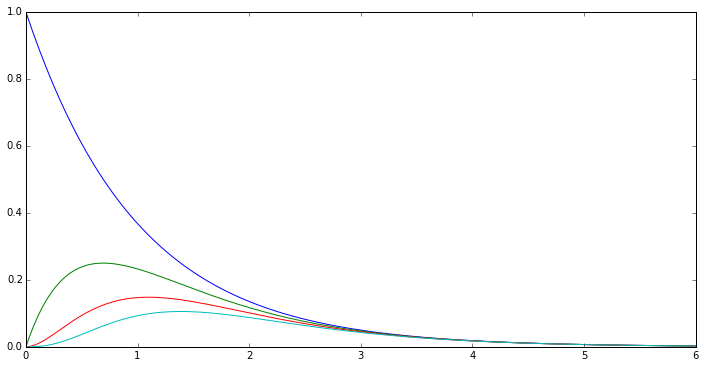

In [3]:
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline
x  = np.linspace(0, 6, 201)
y1 = np.exp(-x)
y2 = (np.exp(x)-1)*np.exp(-2*x)
y3 = (np.exp(2*x)-2*np.exp(x)+1)*np.exp(-3*x)
y4 = (np.exp(3*x)-3*np.exp(2*x)+3*np.exp(x)-1)*np.exp(-4*x)
plot(x, y1, x, y2, x, y3, x, y4)
gcf().set_size_inches(12, 6)

As we can see, all except the 1st give a kind of "bump" function which first rises to a maximum and then decays exponentially. Successive stages fo the filter smooth the attack of the bump more and more. We might be interested in the location of the bump's peak value. To find it, we would have to find the derivative of the respective impulse resonse function, set it 0 and solve for t. So let's find the expressions for the derivatives:

In [4]:
d2 = simplify(diff(h2, t))      # derivative of h2 with respect to t
d3 = simplify(diff(h3, t))      # ...           h3 ...
d4 = simplify(diff(h4, t))      # ...           h4 ...
display(d2, d3, d4)

⎛   a⋅t    ⎞  -2⋅a⋅t
⎝- ℯ    + 2⎠⋅ℯ      

⎛   2⋅a⋅t      a⋅t    ⎞  -3⋅a⋅t
⎝- ℯ      + 4⋅ℯ    - 3⎠⋅ℯ      
───────────────────────────────
               a               

⎛   3⋅a⋅t      2⋅a⋅t      a⋅t    ⎞  -4⋅a⋅t
⎝- ℯ      + 6⋅ℯ      - 9⋅ℯ    + 4⎠⋅ℯ      
──────────────────────────────────────────
                     2                    
                    a                     

...and solve the equations that result from setting these derivatives to zero:

In [5]:
display(solve(d2, t), solve(d3, t), solve(d4, t))

⎡log(2)⎤
⎢──────⎥
⎣  a   ⎦

⎡   log(3)⎤
⎢0, ──────⎥
⎣     a   ⎦

⎡   log(4)⎤
⎢0, ──────⎥
⎣     a   ⎦

We can see that the location of the peak is proportional to the reciprocal of the decay time constant $a$ where the proportionality constant is given by the logarithm of the number of stages after which we tap off the signal. After $N$ stages, the peak of the impulse response is found at:
$$
t_p = \frac{\log(N)}{a} = \frac{\log(N)}{2 \pi \omega_c}
$$

Another interesting question could be at which point the step response pass through 0.5. Let's get some expressions for the step responses:

In [6]:
s1 = simplify(integrate(h1, (t, 0, t)))
s2 = simplify(integrate(h2, (t, 0, t)))
s3 = simplify(integrate(h3, (t, 0, t)))
s4 = simplify(integrate(h4, (t, 0, t)))
display(s1, s2, s3, s4)

     -a⋅t
1   ℯ    
─ - ─────
a     a  

⎛ 2⋅a⋅t      a⋅t    ⎞  -2⋅a⋅t
⎝ℯ      - 2⋅ℯ    + 1⎠⋅ℯ      
─────────────────────────────
                2            
             2⋅a             

⎛ 3⋅a⋅t                    ⎞        
⎜ℯ         2⋅a⋅t    a⋅t   1⎟  -3⋅a⋅t
⎜────── - ℯ      + ℯ    - ─⎟⋅ℯ      
⎝  3                      3⎠        
────────────────────────────────────
                  3                 
                 a                  

⎛ 4⋅a⋅t      3⋅a⋅t      2⋅a⋅t      a⋅t    ⎞  -4⋅a⋅t
⎝ℯ      - 4⋅ℯ      + 6⋅ℯ      - 4⋅ℯ    + 1⎠⋅ℯ      
───────────────────────────────────────────────────
                           4                       
                        4⋅a                        

In [11]:
display(solve(s1-1/2, t))  # -1/2 bcs we want to know, where s1 goes through 1/2
display(solve(s2-1/2, t))
#display(solve(s3-1/2, t)) # sympy can't solve this anymore
# seems like the expressions get complicated rather quick with increasing order

⎡   ⎛ -2.0  ⎞⎤
⎢log⎜───────⎟⎥
⎢   ⎝a - 2.0⎠⎥
⎢────────────⎥
⎣     a      ⎦

⎡   ⎛   2                              ⎞⎤
⎢   ⎜- a  - a⋅(a - 1.0)⋅(a + 1.0) + 1.0⎟⎥
⎢log⎜──────────────────────────────────⎟⎥
⎢   ⎜                      ⎛ 2      ⎞  ⎟⎥
⎢   ⎝  (a - 1.0)⋅(a + 1.0)⋅⎝a  - 1.0⎠  ⎠⎥
⎢───────────────────────────────────────⎥
⎣                   a                   ⎦